<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
# reload all packages for testing
%load_ext autoreload
%autoreload 2

In [6]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [7]:
# Network Definition
g = nx.erdos_renyi_graph(1000, 0.1)

In [18]:
# Model Selection
model = ep.SEIRModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.1)
config.add_model_parameter('alpha', 0.01)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

100%|██████████| 200/200 [00:00<00:00, 288.88it/s]


CPU times: user 688 ms, sys: 8.34 ms, total: 697 ms
Wall time: 694 ms


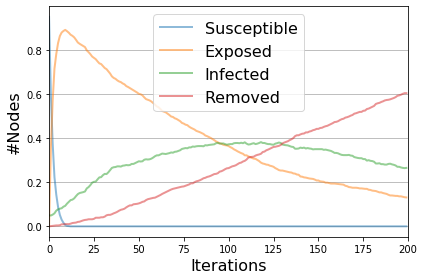

In [19]:
# Simulation
%time iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()